# blood_mapping_top_cpgs_to_genes

### This notebook requires a file from illumnia that relates cpgs on their Human 450K microarray to other information. The file's name is: 'HumanMethylation450_15017482_v1-2 2.csv' The file is too large to put on git hub, however it can be downloaded from here: 


https://support.illumina.com/downloads/humanmethylation450_15017482_v1-2_product_files.html

### In this notebook
* Load info on cpgs from illumina
* Create a dictionary that maps each of oiur top cpgs to its corresponding gene
* Create histogram of frequency of genes assocaited with top 100 cpgs

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')

#### Get Ilummina cpg table

In [2]:
df = pd.read_csv('./illumina_Methylation_Array_info/HumanMethylation450_15017482_v1-2 2.csv', header=7, skipinitialspace=True)

/Users/dcox/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (2,4,11,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df

,IlmnID,Name,AddressA_ID,AlleleA_ProbeSeq,AddressB_ID,AlleleB_ProbeSeq,Infinium_Design_Type,Next_Base,Color_Channel,Forward_Sequence,Genome_Build,CHR,MAPINFO,SourceSeq,Chromosome_36,Coordinate_36,Strand,Probe_SNPs,Probe_SNPs_10,Random_Loci,Methyl27_Loci,UCSC_RefGene_Name,UCSC_RefGene_Accession,UCSC_RefGene_Group,UCSC_CpG_Islands_Name,Relation_to_UCSC_CpG_Island,Phantom,DMR,Enhancer,HMM_Island,Regulatory_Feature_Name,Regulatory_Feature_Group,DHS
0,cg00035864,cg00035864,31729416,AAAACACTAACAATCTTATCCACATAAACCCTTAAATTTATCTCAA...,NaN,NaN,II,NaN,NaN,AATCCAAAGATGATGGAGGAGTGCCCGCTCATGATGTGAAGTACCT...,37.0,Y,8553009.0,AGACACTAGCAGTCTTGTCCACATAGACCCTTGAATTTATCTCAAA...,Y,8613009,F,NaN,NaN,NaN,NaN,TTTY18,NR_001550,TSS1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,cg00050873,cg00050873,32735311,ACAAAAAAACAACACACAACTATAATAATTTTTAAAATAAATAAAC...,3.17174e+07,ACGAAAAAACAACGCACAACTATAATAATTTTTAAAATAAATAAAC...,I,A,Red,TATCTCTGTCTGGCGAGGAGGCAACGCACAACTGTGGTGGTTTTTG...,37.0,Y,9363356.0,CGGGGTCCACCCACTCCAAAAACCACCACAGTTGTGCGTTGCCTCC...,Y,9973356,R,NaN,NaN,NaN,NaN,TSPY4;FAM197Y2,NM_001164471;NR_001553,Body;TSS1500,chrY:9363680-9363943,N_Shore,NaN,NaN,NaN,Y:9973136-9976273,NaN,NaN,NaN
2,cg00061679,cg00061679,28780415,AAAACATTAAAAAACTAATTCACTACTATTTAATTACTTTATTTTC...,NaN,NaN,II,NaN,NaN,TCAACAAATGAGAGACATTGAAGAACTAATTCACTACTATTTGGTT...,37.0,Y,25314171.0,CGATGGAAAATAAAGTAACCAAATAGTAGTGAATTAGTTCTTCAAT...,Y,23723559,R,NaN,NaN,NaN,NaN,DAZ1;DAZ4;DAZ4,NM_004081;NM_020420;NM_001005375,Body;Body;Body,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cg00063477,cg00063477,16712347,TATTCTTCCACACAAAATACTAAACRTATATTTACAAAAATACTTC...,NaN,NaN,II,NaN,NaN,CTCCTGTACTTGTTCATTAAATAATGATTCCTTGGATATACCAAGT...,37.0,Y,22741795.0,CGATGGAAGCATTTTTGTAAATATACGTTCAGTATTTTGTGTGGAA...,Y,21151183,F,rs9341313,rs13447379,NaN,NaN,EIF1AY,NM_004681,Body,chrY:22737825-22738052,S_Shelf,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,cg00121626,cg00121626,19779393,AAAACTAATAAAAATAACTTACAAACCAAATACTATACCCTACAAC...,NaN,NaN,II,NaN,NaN,AGGTGAATGAAGAGACTAATGGGAGTGGCTTGCAAGCCAGGTACTG...,37.0,Y,21664296.0,AGACTAATGGGAGTGGCTTGCAAGCCAGGTACTGTGCCCTACAACT...,Y,20123684,R,NaN,NaN,NaN,NaN,BCORL2,NR_002923,Body,chrY:21664481-21665063,N_Shore,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486423,65622344,NORM_T,Purple,Norm_T59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
486424,57640346,NORM_C,Green,Norm_C60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
486425,47715450,NORM_T,Purple,Norm_T60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
486426,28673402,NORM_C,Green,Norm_C61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Look at the cpg and gene name columns

In [4]:
df[['IlmnID','UCSC_RefGene_Name']].head(100)

,IlmnID,UCSC_RefGene_Name
0,cg00035864,TTTY18
1,cg00050873,TSPY4;FAM197Y2
2,cg00061679,DAZ1;DAZ4;DAZ4
3,cg00063477,EIF1AY
4,cg00121626,BCORL2
...,...,...
95,cg03515816,NaN
96,cg03515901,TGIF2LY;TGIF2LY
97,cg03533500,NaN
98,cg03535417,TSPY4;FAM197Y2


#### List column names in illumina's table

In [5]:
for col in df.columns:
    print(col)

IlmnID
Name
AddressA_ID
AlleleA_ProbeSeq
AddressB_ID
AlleleB_ProbeSeq
Infinium_Design_Type
Next_Base
Color_Channel
Forward_Sequence
Genome_Build
CHR
MAPINFO
SourceSeq
Chromosome_36
Coordinate_36
Strand
Probe_SNPs
Probe_SNPs_10
Random_Loci
Methyl27_Loci
UCSC_RefGene_Name
UCSC_RefGene_Accession
UCSC_RefGene_Group
UCSC_CpG_Islands_Name
Relation_to_UCSC_CpG_Island
Phantom
DMR
Enhancer
HMM_Island
Regulatory_Feature_Name
Regulatory_Feature_Group
DHS


#### Make cpg to gene dictionary, keep first gene name

In [6]:
cpg_to_gene ={}

In [7]:
for Ilid, gene in zip(df.IlmnID.values, df.UCSC_RefGene_Name):
    cpg_to_gene[Ilid] = gene

In [8]:
for key, value in cpg_to_gene.items():
    if type(value) != str:
        continue
    else:
        v = value.split(';')[0]
        cpg_to_gene[key] = v

In [9]:
cpg_to_gene['cg14361627']

'KLF14'

In [10]:
len(cpg_to_gene)

486428

#### Save cpg to gene mapping dictionary

In [11]:
import age_predict.Pickle_unpickle as pu
pu.pickle_object(cpg_to_gene,'cpg_to_gene')

pickled as cpg_to_gene


#### Save illumina's table as a pandas dataframe

In [12]:
df.to_csv('df_IlluminaCpgMap')

### Get top ranked cpgs and map to genes

In [13]:
cpgs_XGboost_blood_ranked = pu.get_pickled_object('../blood/saved_features/cpgs_XGboost_blood_ranked')

In [14]:
# Mapping genes to cpgs
genes_XGboost_blood_ranked = []
for cpg in cpgs_XGboost_blood_ranked:
    gene = cpg_to_gene[cpg]
    genes_XGboost_blood_ranked.append(gene)

In [15]:
df_top_ranked_cpgs_genes = pd.DataFrame({'cpg':cpgs_XGboost_blood_ranked , 'gene': genes_XGboost_blood_ranked})

In [16]:
df_top_ranked_cpgs_genes

,cpg,gene
0,cg04875128,OTUD7A
1,cg16867657,ELOVL2
2,cg14361627,KLF14
3,cg24724428,ELOVL2
4,cg00292135,C7orf13
...,...,...
2254,cg00473462,LOC25845
2255,cg22580512,NCOR2
2256,cg20965017,SDHA
2257,cg06373816,RIMBP2


#### Save table mapping genes to cpgs as a pandas dataframe

In [23]:
df_top_ranked_cpgs_genes.to_csv('df_top_ranked_cpgs_genes.csv')

#### Look at how many genes in top 100 cpgs

In [18]:
gene_set_100 = set(df_top_ranked_cpgs_genes.gene[:100].values)

In [19]:
len(gene_set_100)

62

#### Make histogram of frequemcy of genes in top 100 cpgs

In [20]:
dv  = df_top_ranked_cpgs_genes.gene[:100].value_counts()
dv

KLF14      5
HSD3B7     3
FHL2       3
ELOVL2     3
OTUD7A     2
          ..
VGF        1
EDARADD    1
SRC        1
RAB34      1
TRIM59     1
Name: gene, Length: 61, dtype: int64

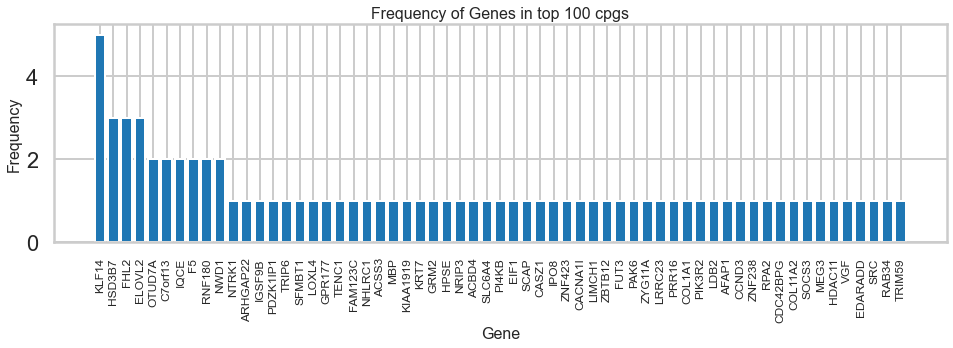

In [21]:
plt.figure(figsize=(16, 4))
plt.bar(dv.index, dv.values)
plt.title('Frequency of Genes in top 100 cpgs', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xlabel('Gene', fontsize=16)
plt.xticks(fontsize=12, rotation=90)
plt.show()